In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Punto 1
## $\frac{du}{dt} = u^{q},$ $t \in [0,10]$ 
para $q>1$: \
\begin{align}
    \frac{du}{u^{q}} &= dt \\ 
    \frac{u^{-q+1}}{-q+1} &= t + C  
\end{align}
Finalmente $u(t) = [(t+c)(1-q)]^{\frac{1}{1-q}}$

tenemos que $u(0) = 1$

$c = \frac{1}{1-q} $

### $u(t) = [t(1-q)+1]^{\frac{1}{1-q}}$


para $q = 0$: 
### $u(t) = e^t$ 

In [3]:
def System(t,q, r0):
    lista = []
    for i in range(len(q)):      
      def getSol(t, u):
          return u**q[i]
      solver = solve_ivp(getSol, [t[0], t[-1]], r0, method = 'RK45', t_eval = t)
      lista.append(solver.y)
      
    return lista

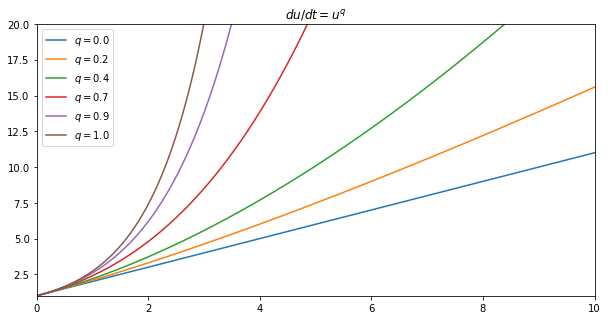

In [4]:
#Discretización temporal
t = np.linspace(0, 10, 1000)
#Valores de q
q = [0., 0.2, 0.4, 0.7, 0.9, 1.]
#Condición inicial

Sol = System(t, q, r0=[1])

plt.figure(figsize=(10,5))
for i, val in enumerate(q):
    plt.plot(t,Sol[i].flatten(), label = f'$q = {val}$')
plt.title("$du/dt = u^q$")
plt.xlim(0,10)
plt.ylim(1,20)
plt.legend(loc = 0)
plt.show()